# MFN vs TFN on ranking-based comparison with only 'useful' alter and at least 2 meetups

In [30]:
import numpy as np
import pandas as pd
import meetup_strategy as ms
import time 
import pickle
import util
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [357]:
import visualization as vs
from functools import reduce
import matplotlib.pyplot as plt
import pickle

## H-MFN details

In [34]:
df_H_MFN = pd.read_csv('final/wp-150/wp-H-MFN.csv')
df_H_MFN = df_H_MFN[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
df_H_MFN = df_H_MFN.rename({'Included Rank': 'Included', 
                            'userid_x': 'userid',
                            'Pi': 'Pi_ego'}, axis=1)

df_H_MFN['Pi_alters_ratio'] = df_H_MFN['Pi_alters'] / df_H_MFN['Pi_ego'] 
df_H_MFN['Pi_ego_alters_ratio'] = df_H_MFN['Pi_ego_alters'] / df_H_MFN['Pi_ego'] 

In [35]:
df_H_MFN

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio
0,1,kanoka,5.770617,2.882110,0.413797,0.747220,2.981229,0.737002,130,130,26,0.561460,1.013865
1,2,826,5.564250,2.822808,0.440421,0.753295,2.981229,0.737002,130,130,26,0.597585,1.022108
2,3,koichi,5.397132,2.779068,0.461599,0.757757,2.981229,0.737002,130,130,26,0.626320,1.028162
3,4,rarirureroppa,5.191310,2.725435,0.487239,0.763207,2.981229,0.737002,130,130,26,0.661110,1.035556
4,5,eugene-donca-mollino,5.221137,2.706943,0.483553,0.765080,2.981229,0.737002,130,130,26,0.656108,1.038098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25424,7,kazuhiko-kokaji,3.715412,2.704822,0.478497,0.658574,2.572991,0.679748,11,11,zuntsuku,0.703932,0.968849
25425,8,smokeymonkey-highness,3.589773,2.703374,0.502866,0.658809,2.572991,0.679748,11,11,zuntsuku,0.739783,0.969195
25426,9,kazuya-minamisawa,3.448418,2.685475,0.529522,0.661711,2.572991,0.679748,11,11,zuntsuku,0.778997,0.973464
25427,10,shino-japan,3.424410,2.670763,0.533974,0.664089,2.572991,0.679748,11,11,zuntsuku,0.785546,0.976963


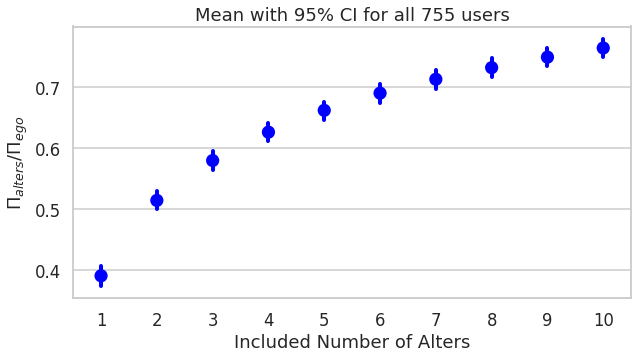

In [38]:
vs.cv_plot(df_H_MFN[df_H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## 24H-MFN details

In [39]:
df_24H_MFN = pd.read_csv('final/wp-150/wp-24H-MFN.csv')
df_24H_MFN = df_24H_MFN[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
df_24H_MFN = df_24H_MFN.rename({'Included Rank': 'Included', 
                            'userid_x': 'userid',
                            'Pi': 'Pi_ego'}, axis=1)

df_24H_MFN['Pi_alters_ratio'] = df_24H_MFN['Pi_alters'] / df_24H_MFN['Pi_ego'] 
df_24H_MFN['Pi_ego_alters_ratio'] = df_24H_MFN['Pi_ego_alters'] / df_24H_MFN['Pi_ego'] 

In [40]:
df_24H_MFN

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio
0,1,atknktn,5.998864,4.192954,0.149961,0.496362,3.965021,0.531858,84,84,00-a,0.281956,0.933260
1,2,yoshihiro,4.891588,4.040873,0.379496,0.520170,3.965021,0.531858,84,84,00-a,0.713529,0.978025
2,3,manabu-tanaka,4.658422,3.978684,0.420025,0.529762,3.965021,0.531858,84,84,00-a,0.789731,0.996059
3,4,kazuya-takeshima,4.495126,3.904517,0.447446,0.541094,3.965021,0.531858,84,84,00-a,0.841289,1.017366
4,5,do9-iigane,4.402871,3.852704,0.462620,0.548944,3.965021,0.531858,84,84,00-a,0.869820,1.032126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283217,32,yamy,3.179526,2.602463,0.578218,0.675055,2.572991,0.679748,35,35,zuntsuku,0.850636,0.993096
283218,33,you_got-o,3.171767,2.596553,0.579587,0.675998,2.572991,0.679748,35,35,zuntsuku,0.852650,0.994483
283219,34,milkmeta,3.168283,2.593993,0.580201,0.676406,2.572991,0.679748,35,35,zuntsuku,0.853553,0.995083
283220,35,hirotomo,3.162167,2.589292,0.581278,0.677155,2.572991,0.679748,35,35,zuntsuku,0.855137,0.996185


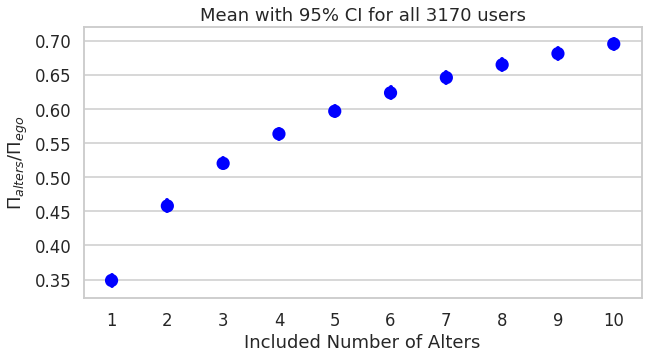

In [42]:
vs.cv_plot(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## D-MFN details

In [43]:
df_D_MFN = pd.read_csv('final/wp-150/wp-D-MFN.csv')
df_D_MFN = df_D_MFN[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
df_D_MFN = df_D_MFN.rename({'Included Rank': 'Included', 
                            'userid_x': 'userid',
                            'Pi': 'Pi_ego'}, axis=1)

df_D_MFN['Pi_alters_ratio'] = df_D_MFN['Pi_alters'] / df_D_MFN['Pi_ego'] 
df_D_MFN['Pi_ego_alters_ratio'] = df_D_MFN['Pi_ego_alters'] / df_D_MFN['Pi_ego'] 

In [44]:
df_D_MFN

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio
0,1,atknktn,5.998864,4.192954,0.149961,0.496362,3.965021,0.531858,75,75,00-a,0.281956,0.933260
1,2,yoshihiro,4.891588,4.040873,0.379496,0.520170,3.965021,0.531858,75,75,00-a,0.713529,0.978025
2,3,maako-tazawa,4.583591,3.914241,0.432683,0.539615,3.965021,0.531858,75,75,00-a,0.813531,1.014585
3,4,kazuya-takeshima,4.420584,3.851773,0.459724,0.549085,3.965021,0.531858,75,75,00-a,0.864374,1.032390
4,5,manabu-tanaka,4.298000,3.811978,0.479609,0.555076,3.965021,0.531858,75,75,00-a,0.901762,1.043656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216081,29,whopper,3.215941,2.624691,0.571768,0.671500,2.572991,0.679748,32,32,zuntsuku,0.841147,0.987866
216082,30,kaya,3.194468,2.613746,0.575577,0.673252,2.572991,0.679748,32,32,zuntsuku,0.846750,0.990443
216083,31,bathyscaphe-trieste,3.187514,2.608514,0.576807,0.674089,2.572991,0.679748,32,32,zuntsuku,0.848560,0.991674
216084,32,hirotomo,3.180557,2.603198,0.578036,0.674938,2.572991,0.679748,32,32,zuntsuku,0.850368,0.992923


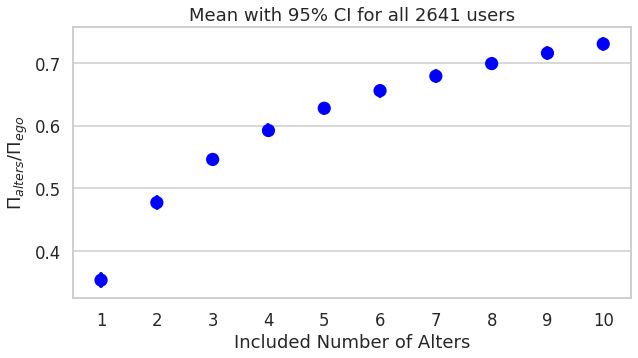

In [45]:
vs.cv_plot(df_D_MFN[df_D_MFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## TFN details

In [46]:
df_TFN =pd.read_csv('final/wp-150/wp-TFN.csv')
df_TFN = df_TFN[['Included Rank','userid_y', 'CCE_alters', 'CCE_ego_alters', 'Pi_alters', 'Pi_ego_alters', 
                                 'LZ_entropy', 'Pi', 'n_meetupers_x', 'n_meetupers_y', 'userid_x']]
df_TFN = df_TFN.rename({'Included Rank': 'Included', 
                              'userid_x': 'userid',
                             'Pi': 'Pi_ego'}, axis=1)

df_TFN['Pi_alters_ratio'] = df_TFN['Pi_alters'] / df_TFN['Pi_ego'] 
df_TFN['Pi_ego_alters_ratio'] = df_TFN['Pi_ego_alters'] / df_TFN['Pi_ego'] 

In [47]:
df_TFN

,Included,userid_y,CCE_alters,CCE_ego_alters,Pi_alters,Pi_ego_alters,LZ_entropy,Pi_ego,n_meetupers_x,n_meetupers_y,userid,Pi_alters_ratio,Pi_ego_alters_ratio
0,1,qiring,5.518304,3.827609,0.259986,0.552727,3.965021,0.531858,2,2,00-a,0.488826,1.039238
1,2,hironao,4.856419,3.721633,0.385721,0.568564,3.965021,0.531858,2,2,00-a,0.725234,1.069015
2,1,ju,7.485779,4.758456,0.073892,0.510096,4.849463,0.498272,1,1,01,0.148296,1.023731
3,1,kuma,4.511867,2.383254,0.071778,0.670599,2.261324,0.692539,1,1,062,0.103645,0.968320
4,1,aaron-wallis,9.005984,3.824241,0.038443,0.679905,3.842487,0.678117,1,1,08,0.056690,1.002637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21017,4,fathiya-adisza,4.544235,3.638937,0.532331,0.644074,4.113363,0.586663,7,7,zulfan-tm,0.907387,1.097859
21018,5,luna-fedrafaisya,4.325869,3.606031,0.560139,0.647967,4.113363,0.586663,7,7,zulfan-tm,0.954788,1.104495
21019,6,bayu-aditya,4.272282,3.575074,0.566877,0.651619,4.113363,0.586663,7,7,zulfan-tm,0.966272,1.110720
21020,7,dita-sabila,4.269715,3.564951,0.567198,0.652811,4.113363,0.586663,7,7,zulfan-tm,0.966821,1.112752


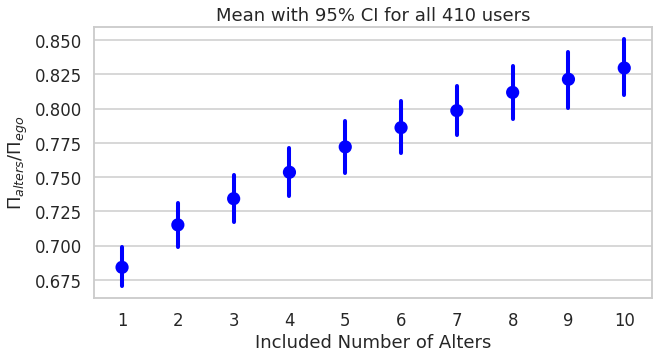

In [48]:
vs.cv_plot(df_TFN[df_TFN['n_meetupers_x'] >=10], threshold=10, 
           plot_type='errorbar', mode='talk', l=10, w=5)

## Compare MFNs and TFN, different egos in these networks

In [60]:
df_H_MFN['category'] = 'H-MFN'
df_D_MFN['category'] = 'D-MFN'
df_24H_MFN['category'] = '24H-MFN'
df_TFN['category'] = 'TFN'

In [61]:
all_networks = pd.concat([df_H_MFN, df_24H_MFN, df_D_MFN, df_TFN])

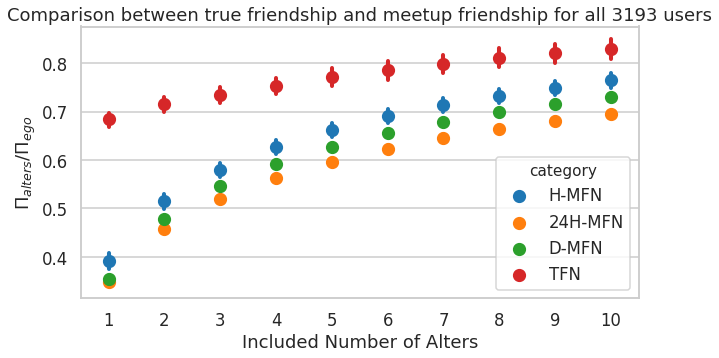

In [62]:
vs.cv_compare_plot(all_networks[all_networks['n_meetupers_x'] >=10], threshold=10, 
                   mode='talk', l=10, w=5)

## Compare MFNs and TFN, shared egos in both networks

In [93]:
share_users_total = list(set(df_24H_MFN['userid'].tolist()) & 
                   set(df_H_MFN['userid'].tolist()) & 
                   set(df_D_MFN['userid'].tolist()) &
                   set(df_TFN['userid'].tolist()))
len(share_users_total)

710

In [64]:
share_users = list(set(df_24H_MFN[df_24H_MFN['n_meetupers_x'] >=10]['userid'].tolist()) & 
                   set(df_H_MFN[df_H_MFN['n_meetupers_x']>=10]['userid'].tolist()) & 
                   set(df_D_MFN[df_D_MFN['n_meetupers_x']>=10]['userid'].tolist()) &
                   set(df_TFN[df_TFN['n_meetupers_x']>=10]['userid'].tolist()) 
                  )
len(share_users)

289

In [65]:
share_network = pd.concat([df_24H_MFN[df_24H_MFN['userid'].isin(share_users)], 
                           df_H_MFN[df_H_MFN['userid'].isin(share_users)],
                           df_D_MFN[df_D_MFN['userid'].isin(share_users)],
                           df_TFN[df_TFN['userid'].isin(share_users)]
                          ])

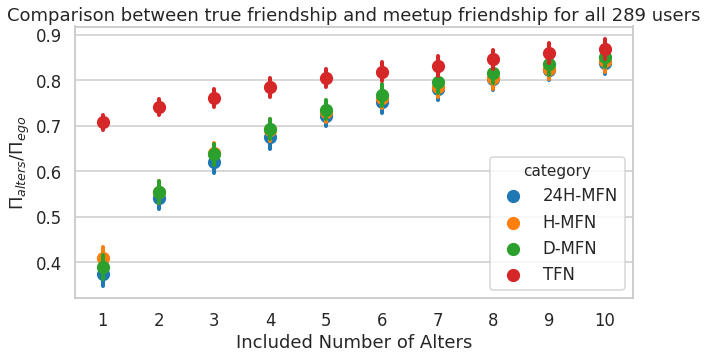

In [66]:
# vs.cv_compare_plot(share_network[share_network['n_meetupers_x'] >=10], threshold=10, mode='talk', l=10, w=5)
vs.cv_compare_plot(share_network, threshold=10, mode='talk', l=10, w=5)

# Check these friendship networks (Basic)

In [69]:
print(len(df_24H_MFN), len(df_D_MFN), len(df_H_MFN), len(df_TFN))

283222 216086 25429 21022


In [70]:
print(df_24H_MFN['userid'].nunique(), df_D_MFN['userid'].nunique(), df_H_MFN['userid'].nunique(), df_TFN['userid'].nunique())

7383 7212 755 5557


In [80]:
n_meetupers_24H = df_24H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_24H['category'] = '24H-MFN'

n_meetupers_D = df_D_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_D['category'] = 'D-MFN'

n_meetupers_H = df_H_MFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_H['category'] = 'H-MFN'

n_meetupers_TFN = df_TFN.groupby('userid')['userid_y'].count().reset_index(name = 'count')
n_meetupers_TFN['category'] = 'TFN'

In [81]:
n_meetupers_ego = pd.concat([n_meetupers_24H, n_meetupers_D, n_meetupers_H, n_meetupers_TFN
                            ]
                           )

Text(0.5, 1.0, 'The average number of alters for each ego (all users)')

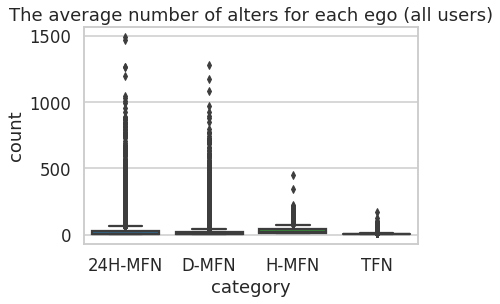

In [105]:
sns.boxplot(data=n_meetupers_ego, x='category', y = 'count').set_title("The average number of alters for each ego (all users)")

In [83]:
print(df_24H_MFN.groupby('userid')['userid_y'].count().sum()/df_24H_MFN['userid'].nunique(),
      df_D_MFN.groupby('userid')['userid_y'].count().sum()/df_D_MFN['userid'].nunique(),
      df_H_MFN.groupby('userid')['userid_y'].count().sum()/df_H_MFN['userid'].nunique(),
      df_TFN.groupby('userid')['userid_y'].count().sum()/df_TFN['userid'].nunique(),
)

38.361370716510905 29.962007764836383 33.680794701986756 3.7829764261292063


# Check these friendship networks on shared users (total)

In [94]:
len(share_users_total)

710

In [96]:
share_network_total = pd.concat([df_24H_MFN[df_24H_MFN['userid'].isin(share_users_total)], 
                           df_H_MFN[df_H_MFN['userid'].isin(share_users_total)],
                           df_D_MFN[df_D_MFN['userid'].isin(share_users_total)],
                           df_TFN[df_TFN['userid'].isin(share_users_total)]
                          ])

In [109]:
share_network_total.groupby('category').size()

category
24H-MFN    168303
D-MFN      136401
H-MFN       24509
TFN          8224
dtype: int64

In [97]:
n_meetuper_total_shared_ego = share_network_total.groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego (all shared users)')

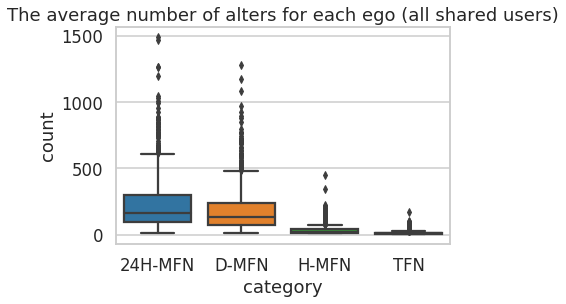

In [106]:
sns.boxplot(data=n_meetuper_total_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego (all shared users)")

In [99]:
n_meetuper_total_shared_ego.groupby('category')['count'].sum()/len(share_users_total)

category
24H-MFN    237.046479
D-MFN      192.114085
H-MFN       34.519718
TFN         11.583099
Name: count, dtype: float64

# Check these friendship networks on shared users (>=10 meetupers)

In [100]:
len(share_users)

289

In [110]:
share_network.groupby('category').size()

category
24H-MFN    85480
D-MFN      70498
H-MFN      13549
TFN         6346
dtype: int64

In [101]:
n_meetuper_shared_ego = share_network.groupby(['category', 'userid'])['Included'].count().reset_index(name='count')

Text(0.5, 1.0, 'The average number of alters for each ego \n (Shared users with >= 10 meetupers)')

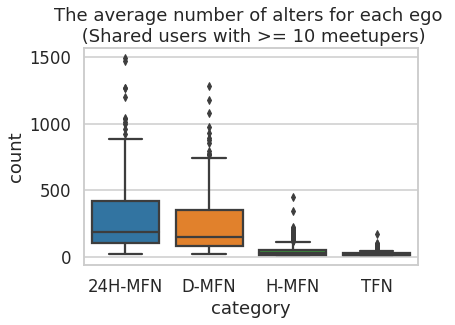

In [108]:
sns.boxplot(data=n_meetuper_shared_ego, x='category', 
            y = 'count').set_title("The average number of alters for each ego \n (Shared users with >= 10 meetupers)")

In [103]:
n_meetuper_shared_ego.groupby('category')['count'].sum()/len(share_users)

category
24H-MFN    295.778547
D-MFN      243.937716
H-MFN       46.882353
TFN         21.958478
Name: count, dtype: float64

# Check these friendship network only on top-10 friends

In [114]:
VIP_network = share_network[share_network['Included'] <=10]

In [168]:
VIP_network_24H_MFN = VIP_network[VIP_network['category'] == '24H-MFN'][['Included','userid', 'userid_y']]
VIP_network_D_MFN = VIP_network[VIP_network['category'] == 'D-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_H_MFN = VIP_network[VIP_network['category'] == 'H-MFN'][['Included', 'userid', 'userid_y']]
VIP_network_TFN = VIP_network[VIP_network['category'] == 'TFN'][['Included', 'userid', 'userid_y']]

In [177]:
VIP_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Included','userid'],
                                                how='left'), [VIP_network_24H_MFN, 
                                                             VIP_network_D_MFN,
                                                             VIP_network_H_MFN,
                                                             VIP_network_TFN])
VIP_merged.columns = ['Included', 'userid', '24H-MFN', 'D-MFN', 'H-MFN', 'TFN']

### Gobal Jaccard similarity for all alters in these networks

In [295]:
VIP_similarity = util.jaccard_pandas_similarity(VIP_merged[VIP_merged.columns[-4:]])
VIP_similarity = pd.DataFrame(VIP_similarity, columns=['24H-MFN', 'D-MFN', 'H-MFN', 'TFN'])
VIP_similarity.index = ['24H-MFN', 'D-MFN', 'H-MFN', 'TFN']

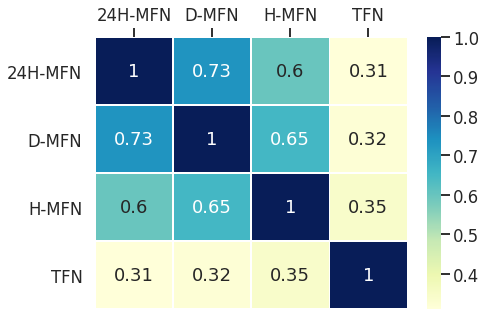

In [298]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(VIP_similarity , cmap="YlGnBu", ax=ax,
            linewidths=.5, annot=True)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
# ax.set_title('Jaccard similarity for all alters')
plt.show()

### Focus on each egos in these networks

In [302]:
individual_similarity = {user: util.jaccard_pandas_similarity(VIP_merged[VIP_merged['userid'] == user]
                                                              [['24H-MFN', 'D-MFN', 'H-MFN', 'TFN']]) for user in share_users}

In [315]:
df_individual_similarity = pd.DataFrame(np.transpose(np.array([
    [individual_similarity[user][0][1] for user in share_users],
    [individual_similarity[user][0][2] for user in share_users],
    [individual_similarity[user][0][3] for user in share_users],
    [individual_similarity[user][1][2] for user in share_users],
    [individual_similarity[user][1][3] for user in share_users],
    [individual_similarity[user][2][3] for user in share_users]
])), columns=['24H_vs_D',
           '24H_vs_D',
           '24H_vs_TFN',
           'D_vs_H',
           'D_vs_TFN',
           'H_vs_TFN']
)
# IS_24H_D = [individual_similarity[user][0][1] for user in share_users]
# IS_24H_H = [individual_similarity[user][0][2] for user in share_users]
# IS_24H_TFN = [individual_similarity[user][0][3] for user in share_users]

# IS_D_H = [individual_similarity[user][1][2] for user in share_users]
# IS_D_TFN = [individual_similarity[user][1][3] for user in share_users]

# IS_H_TFN = [individual_similarity[user][2][3] for user in share_users]

In [323]:
df_individual_similarity = pd.concat([pd.DataFrame([['24H_vs_D', individual_similarity[user][0][1]] for user in share_users], 
                                         columns=['Compare', 'Jaccard']), 
                           pd.DataFrame([['24H_vs_D', individual_similarity[user][0][2]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['24H_vs_TFN', individual_similarity[user][0][3]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['D_vs_H', individual_similarity[user][1][2]] for user in share_users],
                                       columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['D_vs_TFN', individual_similarity[user][1][3]] for user in share_users],
                                        columns=['Compare', 'Jaccard']),
                           pd.DataFrame([['H_vs_TFN', individual_similarity[user][2][3]] for user in share_users], 
                                       columns=['Compare', 'Jaccard'])
                                        ]
                                    )

In [324]:
df_individual_similarity 

,Compare,Jaccard
0,24H_vs_D,0.538462
1,24H_vs_D,0.538462
2,24H_vs_D,0.818182
3,24H_vs_D,0.538462
4,24H_vs_D,1.000000
...,...,...
284,H_vs_TFN,0.428571
285,H_vs_TFN,0.111111
286,H_vs_TFN,0.333333
287,H_vs_TFN,0.538462


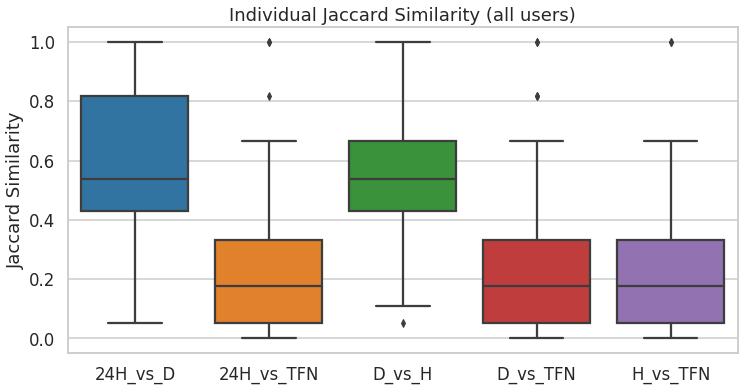

In [329]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df_individual_similarity , x='Compare', 
            y = 'Jaccard')
ax.set_title('Individual Jaccard Similarity (all users)')
ax.set_xlabel('')
ax.set_ylabel('Jaccard Similarity')
plt.show()

### Check Shared-Location rate (What does mean high ranking alter?)

In [335]:
VIP_Rank = VIP_network[['Included', 'userid', 'userid_y', 'category']]

In [359]:
pickle_in = open("temp_data/wp-150/weeplace_placeidT_150.pickle", "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [363]:
VIP_rate = VIP_Rank.copy()
VIP_rate['USLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[0], axis=1)
VIP_rate['SLR'] = VIP_Rank.apply(lambda row:util.shared_location_rate(row.userid, row.userid_y, placeidT)[1], axis=1)

In [364]:
VIP_rate

,Included,userid,userid_y,category,USLR,SLR
561,1,4sq-seoul,4280,24H-MFN,0.181034,0.349296
562,2,4sq-seoul,siegfrid,24H-MFN,0.137931,0.354930
563,3,4sq-seoul,angie-k,24H-MFN,0.043103,0.287324
564,4,4sq-seoul,golee,24H-MFN,0.155172,0.340845
565,5,4sq-seoul,wungjae-hyun,24H-MFN,0.275862,0.388732
...,...,...,...,...,...,...
20940,6,zachary-blank,heidi7,TFN,0.062411,0.028377
20941,7,zachary-blank,maria-eriksson,TFN,0.034043,0.019864
20942,8,zachary-blank,andrew-hess,TFN,0.080851,0.044835
20943,9,zachary-blank,john-sheldon,TFN,0.031206,0.058456


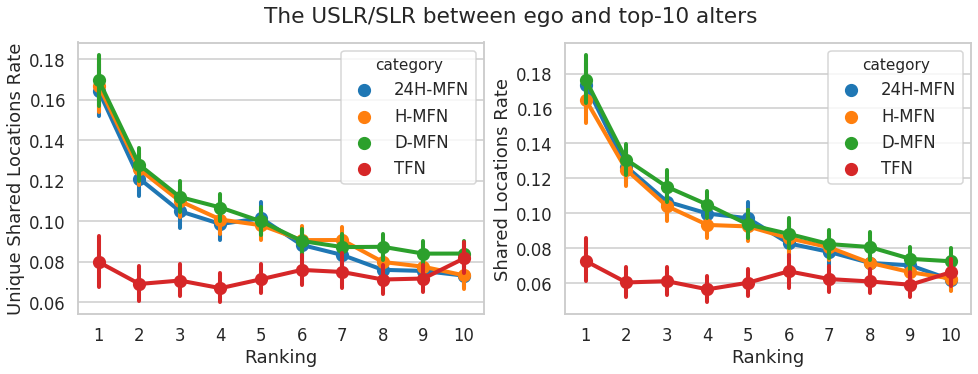

In [381]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle("The USLR/SLR between ego and top-10 alters")

sns.pointplot(x="Included", y="USLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax1)
ax1.set_ylabel('Unique Shared Locations Rate')
ax1.set_xlabel('Ranking')

sns.pointplot(x="Included", y="SLR", 
              data=VIP_rate, 
              hue='category', ci=95, join='True', ax=ax2)
ax2.set_ylabel('Shared Locations Rate')
ax2.set_xlabel('Ranking')
plt.show()